In [1]:
import pandas as pd

# Load datasets
train_data = pd.read_csv('CMAPSSData/train_FD001.txt', sep=' ', header=None).dropna(axis=1)
test_data = pd.read_csv('CMAPSSData/test_FD001.txt', sep=' ', header=None).dropna(axis=1)
rul_data = pd.read_csv('CMAPSSData/RUL_FD001.txt', header=None)

# Assign column names
cols = ['unit_number', 'time_in_cycles'] + \
       [f'operational_setting_{i}' for i in range(1, 4)] + \
       [f'sensor_measurement_{i}' for i in range(1, 22)]
train_data.columns = cols
test_data.columns = cols
print("Datasets loaded successfully!")


Datasets loaded successfully!


In [2]:
print(train_data)

       unit_number  time_in_cycles  operational_setting_1  \
0                1               1                -0.0007   
1                1               2                 0.0019   
2                1               3                -0.0043   
3                1               4                 0.0007   
4                1               5                -0.0019   
...            ...             ...                    ...   
20626          100             196                -0.0004   
20627          100             197                -0.0016   
20628          100             198                 0.0004   
20629          100             199                -0.0011   
20630          100             200                -0.0032   

       operational_setting_2  operational_setting_3  sensor_measurement_1  \
0                    -0.0004                  100.0                518.67   
1                    -0.0003                  100.0                518.67   
2                     0.0003        

In [3]:
# Drop duplicates and ensure operational settings are non-negative
train_data = train_data.drop_duplicates()
test_data = test_data.drop_duplicates()

train_data.loc[:, 'operational_setting_1':'operational_setting_3'] = \
    train_data.loc[:, 'operational_setting_1':'operational_setting_3'].clip(lower=0)
test_data.loc[:, 'operational_setting_1':'operational_setting_3'] = \
    test_data.loc[:, 'operational_setting_1':'operational_setting_3'].clip(lower=0)

print("Datasets cleaned successfully!")


Datasets cleaned successfully!


In [4]:
# Add RUL to training data
train_rul = train_data.groupby('unit_number')['time_in_cycles'].max().reset_index()
train_rul.columns = ['unit_number', 'max_cycles']
train_data = train_data.merge(train_rul, on='unit_number', how='left')
train_data['RUL'] = train_data['max_cycles'] - train_data['time_in_cycles']
train_data = train_data.drop(['max_cycles'], axis=1)

print("RUL calculated for training data!")
print(train_data)

RUL calculated for training data!
       unit_number  time_in_cycles  operational_setting_1  \
0                1               1                 0.0000   
1                1               2                 0.0019   
2                1               3                 0.0000   
3                1               4                 0.0007   
4                1               5                 0.0000   
...            ...             ...                    ...   
20626          100             196                 0.0000   
20627          100             197                 0.0000   
20628          100             198                 0.0004   
20629          100             199                 0.0000   
20630          100             200                 0.0000   

       operational_setting_2  operational_setting_3  sensor_measurement_1  \
0                     0.0000                  100.0                518.67   
1                     0.0000                  100.0                518.67   
2 

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Normalize sensor data for both train and test sets
sensor_cols = [col for col in train_data.columns if 'sensor_measurement' in col]
scaler = MinMaxScaler()
train_data[sensor_cols] = scaler.fit_transform(train_data[sensor_cols])
test_data[sensor_cols] = scaler.transform(test_data[sensor_cols])

print("Sensor data normalized!")


Sensor data normalized!


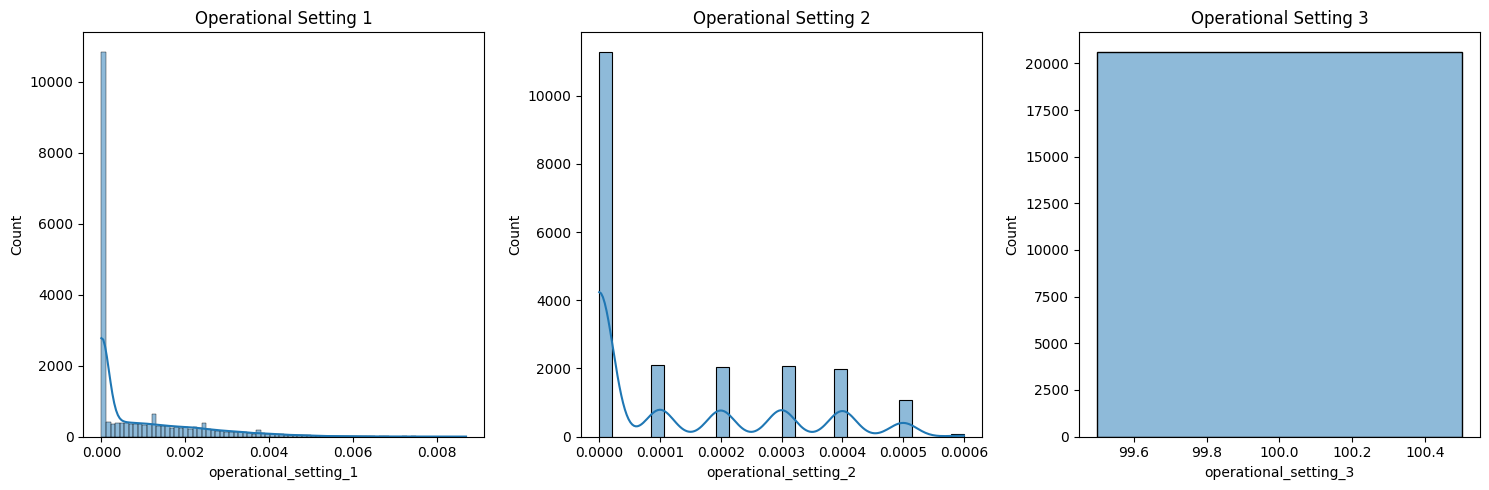

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize operational settings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(1, 4):
    sns.histplot(train_data[f'operational_setting_{i}'], kde=True, ax=axes[i-1])
    axes[i-1].set_title(f'Operational Setting {i}')
plt.tight_layout()
plt.show()


C:\Users\Tharun\AppData\Local\Temp\ipykernel_22104\4024740770.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(train_data[col], label=col, linewidth=1)
C:\Users\Tharun\AppData\Local\Temp\ipykernel_22104\4024740770.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(train_data[col], label=col, linewidth=1)
C:\Users\Tharun\AppData\Local\Temp\ipykernel_22104\4024740770.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(train_data[col], label=col, linewidth=1)
C:\Users\Tharun\AppData\Local\Temp\ipykernel_22104\4024740770.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(train_data[col], label=col, linewidth=1)
C:\Users\Tharun\AppData\Local\Temp\ipykernel

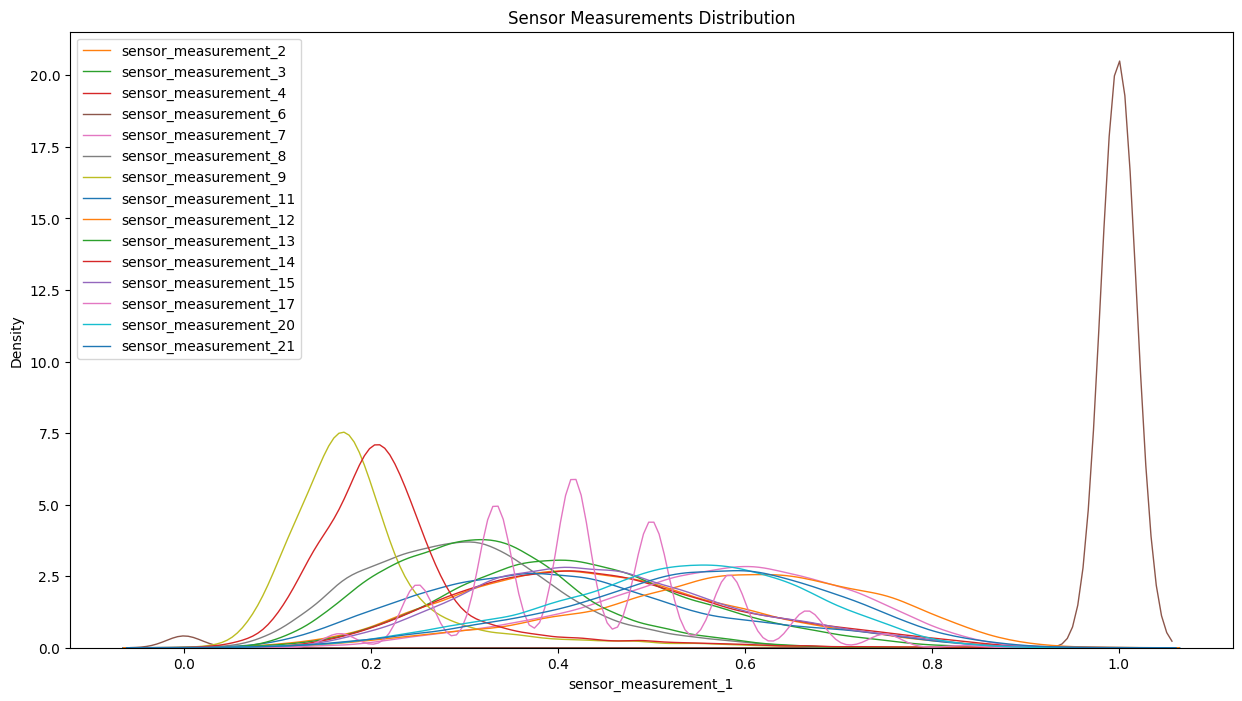

In [7]:
# Visualize sensor data distributions
plt.figure(figsize=(15, 8))
for col in sensor_cols:
    sns.kdeplot(train_data[col], label=col, linewidth=1)
plt.legend()
plt.title("Sensor Measurements Distribution")
plt.show()


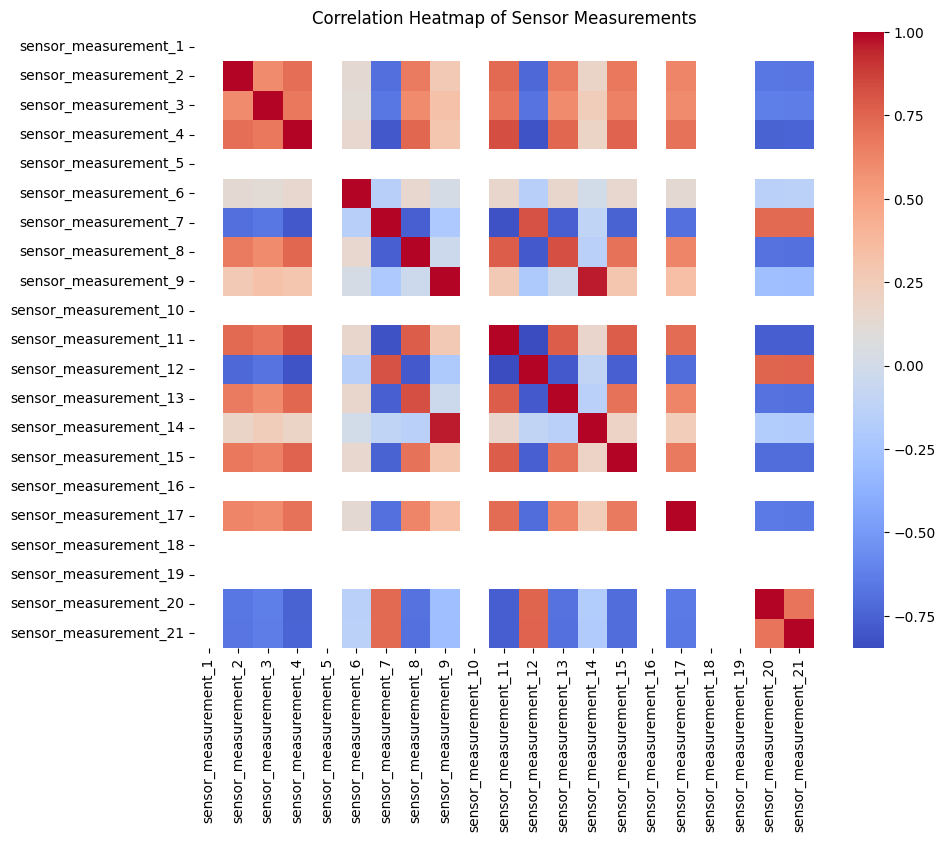

In [8]:
# Correlation matrix for sensors
corr_matrix = train_data[sensor_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Sensor Measurements")
plt.show()

C:\Users\Tharun\AppData\Local\Temp\ipykernel_22104\3276541964.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(train_data[sensor], ax=axes[i], label='Training', color='blue', fill=True, alpha=0.3)
C:\Users\Tharun\AppData\Local\Temp\ipykernel_22104\3276541964.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(test_data[sensor], ax=axes[i], label='Test', color='orange', fill=True, alpha=0.3)
C:\Users\Tharun\AppData\Local\Temp\ipykernel_22104\3276541964.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
C:\Users\Tharun\AppData\Local\Temp\ipykernel_22104\3276541964.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this

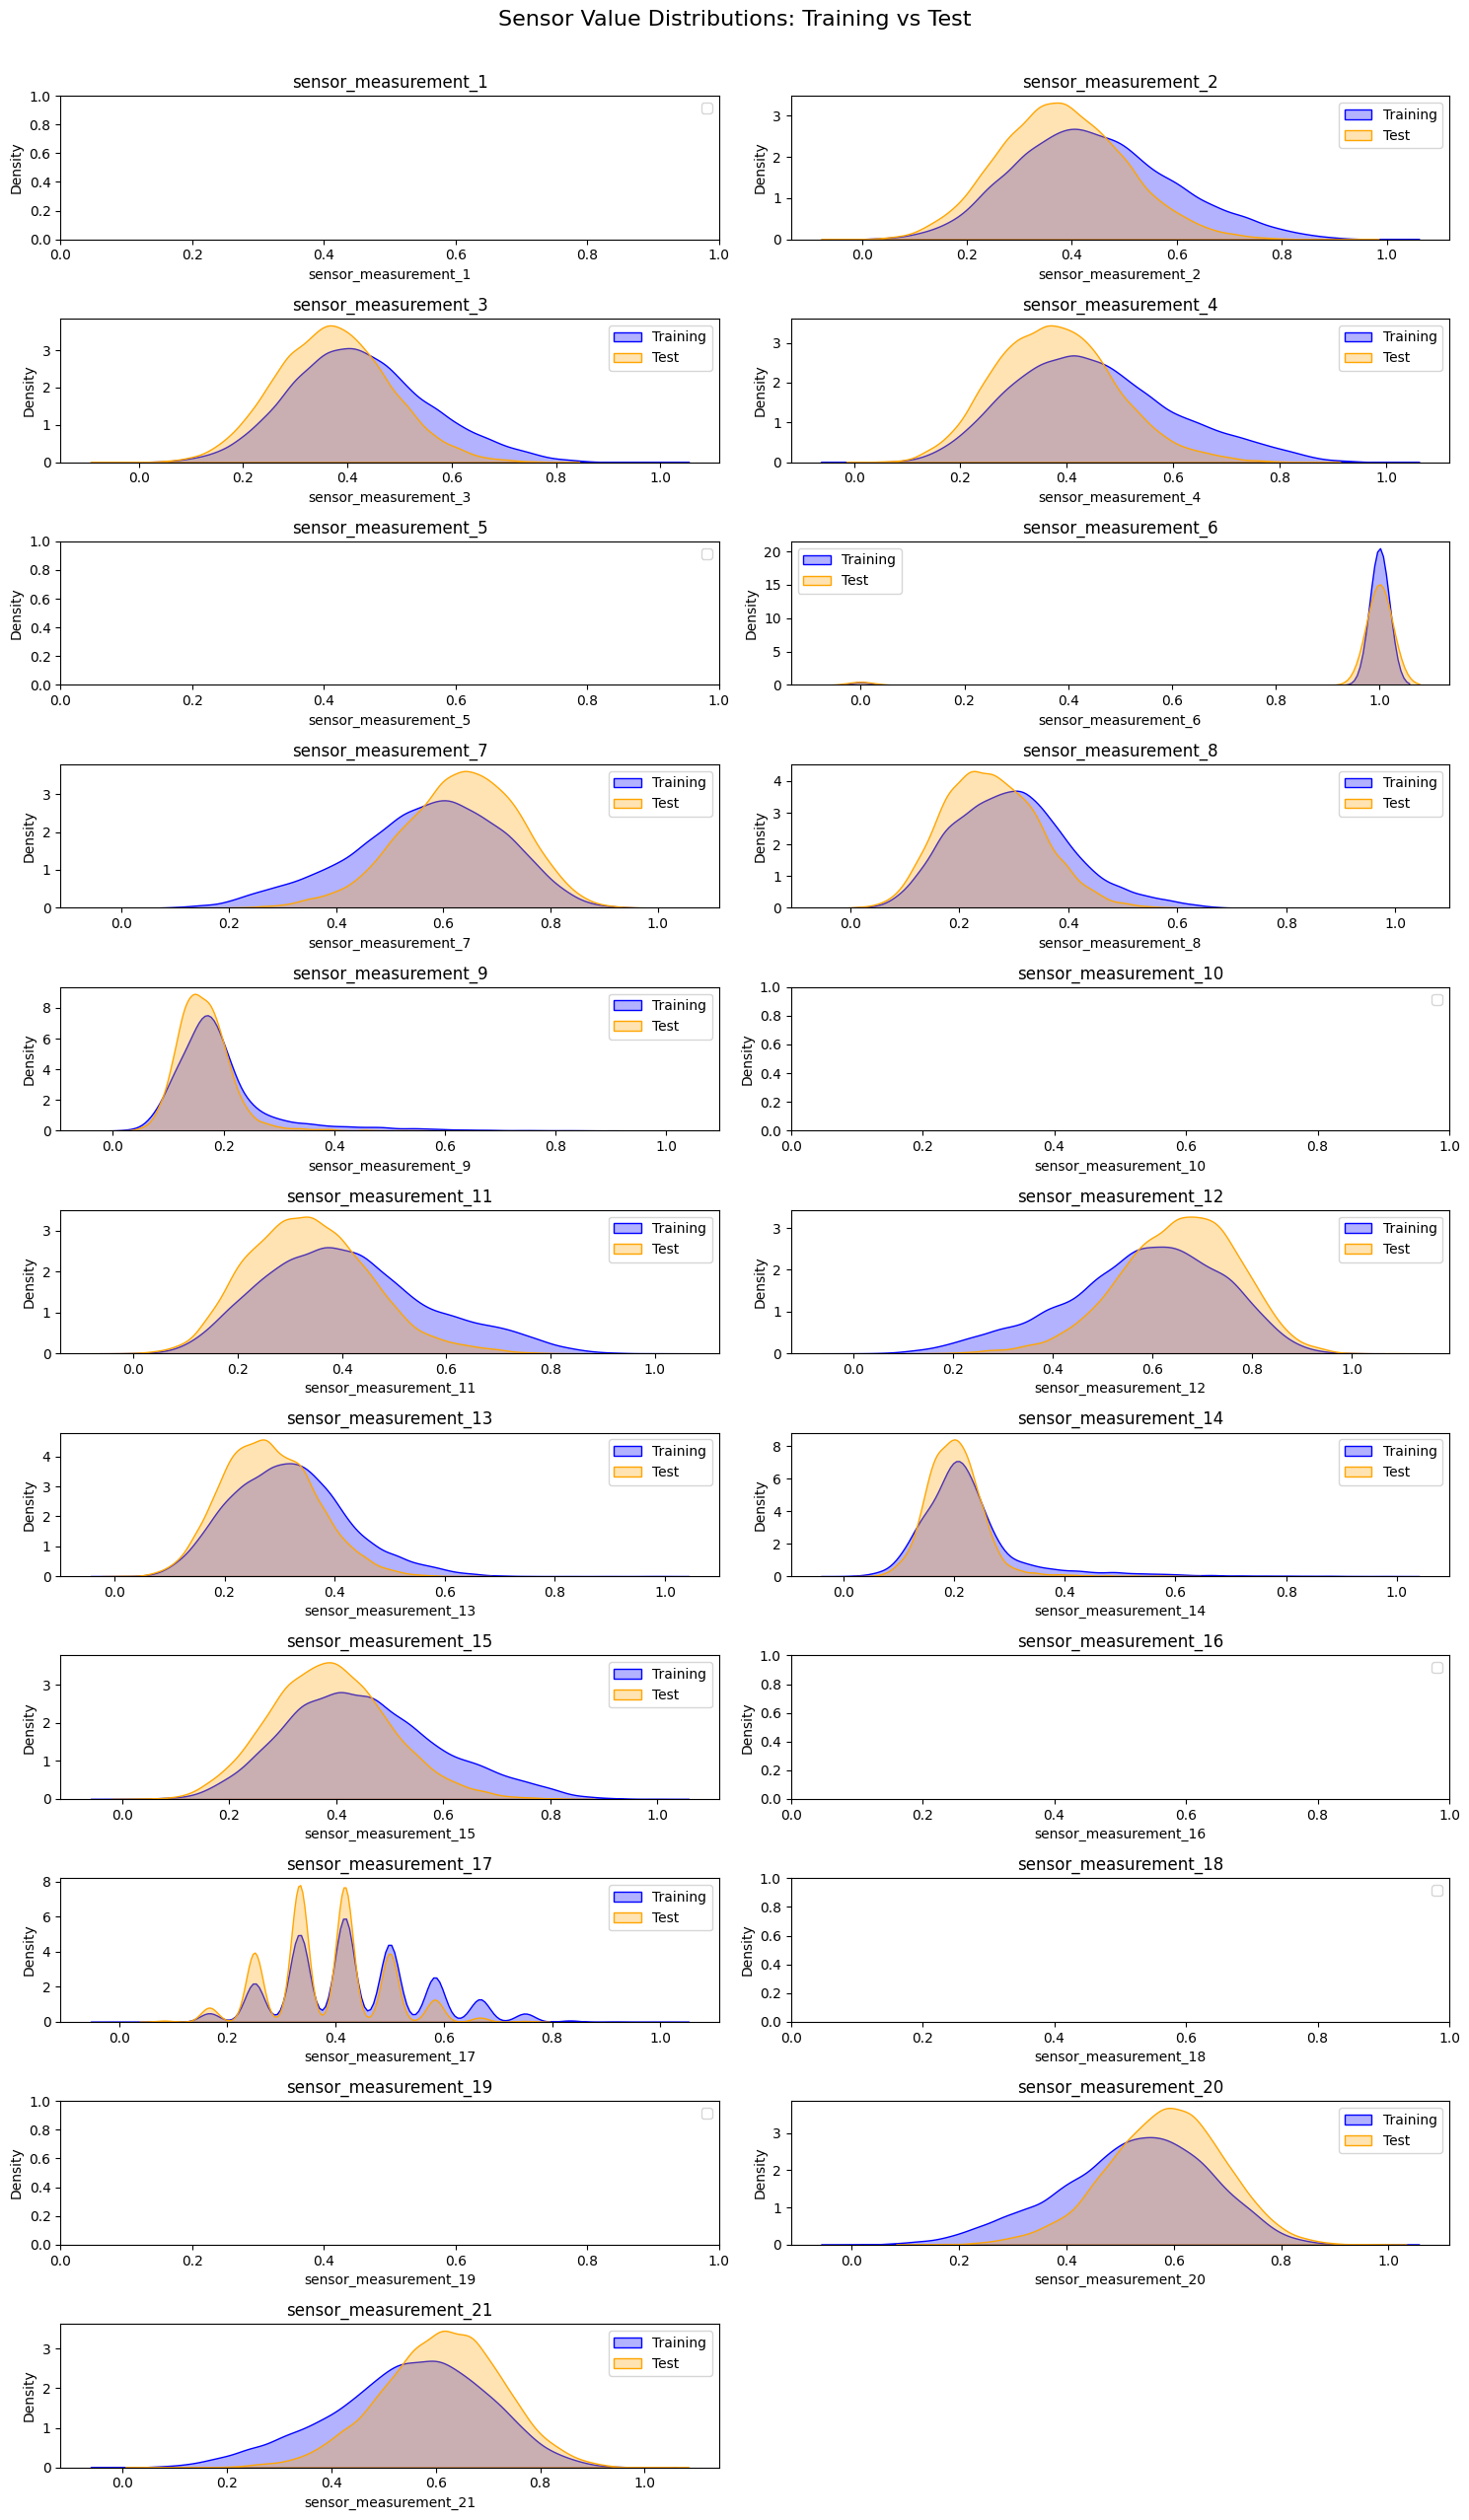

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of sensor columns
sensor_cols = [f'sensor_measurement_{i}' for i in range(1, 22)]

# Create subplots for all 21 sensors
fig, axes = plt.subplots(11, 2, figsize=(15, 25))  # 11 rows, 2 columns for 21 sensors
axes = axes.flatten()  # Flatten axes for easy iteration

for i, sensor in enumerate(sensor_cols):
    sns.kdeplot(train_data[sensor], ax=axes[i], label='Training', color='blue', fill=True, alpha=0.3)
    sns.kdeplot(test_data[sensor], ax=axes[i], label='Test', color='orange', fill=True, alpha=0.3)
    axes[i].set_title(sensor)
    axes[i].legend()

# Hide any empty subplot in the last row
for j in range(len(sensor_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle("Sensor Value Distributions: Training vs Test", y=1.02, fontsize=16)
plt.show()


In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load true RUL values from RUL_FD001.txt
rul_data = pd.read_csv("CMAPSSData/RUL_FD001.txt", header=None, names=['true_rul'])

# Extract the last cycle for each engine in the test set
test_rul = test_data.groupby('unit_number')['time_in_cycles'].max().reset_index()
test_rul.columns = ['unit_number', 'last_cycle']

# Merge the true RUL values from RUL_FD001.txt to the test_rul DataFrame
test_rul = test_rul.merge(rul_data, left_index=True, right_index=True)

# Generate dummy predictions for RUL (Replace this with actual model predictions later)
# For now, let's use random predictions or a constant value for testing
np.random.seed(42)  # For reproducibility
test_rul['predicted_rul'] = np.random.randint(20, 150, size=len(test_rul))  # Dummy predictions

# Evaluate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test_rul['true_rul'], test_rul['predicted_rul']))
mae = mean_absolute_error(test_rul['true_rul'], test_rul['predicted_rul'])

print("Test RUL Data with True and Predicted RUL:")
print(test_rul)

print(f"\nEvaluation Metrics:\nRMSE: {rmse:.2f}, MAE: {mae:.2f}")


Test RUL Data with True and Predicted RUL:
    unit_number  last_cycle  true_rul  predicted_rul
0             1          31       112            122
1             2          49        98            112
2             3         126        69             34
3             4         106        82            126
4             5          98        91             91
..          ...         ...       ...            ...
95           96          97       137            109
96           97         134        82             61
97           98         121        59            143
98           99          97       117             82
99          100         198        20            115

[100 rows x 4 columns]

Evaluation Metrics:
RMSE: 56.14, MAE: 44.86


In [15]:
# Calculate RUL for training data
train_rul = train_data.groupby('unit_number')['time_in_cycles'].max().reset_index()
train_rul.columns = ['unit_number', 'max_cycle']

# Add RUL to training data
train_data = train_data.merge(train_rul, on='unit_number', how='left')
train_data['RUL'] = train_data['max_cycle'] - train_data['time_in_cycles']
train_data = train_data.drop(columns=['max_cycle'])  # Remove unnecessary column

print("Training data with calculated RUL:")
print(train_data.head())

Training data with calculated RUL:
   unit_number  time_in_cycles  operational_setting_1  operational_setting_2  \
0            1               1                 0.0000                 0.0000   
1            1               2                 0.0019                 0.0000   
2            1               3                 0.0000                 0.0003   
3            1               4                 0.0007                 0.0000   
4            1               5                 0.0000                 0.0000   

   operational_setting_3  sensor_measurement_1  sensor_measurement_2  \
0                  100.0                   0.0              0.183735   
1                  100.0                   0.0              0.283133   
2                  100.0                   0.0              0.343373   
3                  100.0                   0.0              0.343373   
4                  100.0                   0.0              0.349398   

   sensor_measurement_3  sensor_measurement_4  sens

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define feature columns
feature_cols = [col for col in train_data.columns if 'sensor_measurement' in col or 'operational_setting' in col]

# Split the training data
X_train, X_val, y_train, y_val = train_test_split(train_data[feature_cols], train_data['RUL'], test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Validate the model (optional)
val_predictions = model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
val_mae = mean_absolute_error(y_val, val_predictions)
print(f"Validation RMSE: {val_rmse:.2f}, MAE: {val_mae:.2f}")


Validation RMSE: 41.57, MAE: 29.67


In [17]:
# Predict RUL for the test data
test_features = test_data[feature_cols]
test_data['predicted_rul'] = model.predict(test_features)

print("Test data with predicted RUL:")
print(test_data[['unit_number', 'time_in_cycles', 'predicted_rul']].head())


Test data with predicted RUL:
   unit_number  time_in_cycles  predicted_rul
0            1               1         182.82
1            1               2         171.53
2            1               3         164.89
3            1               4         176.84
4            1               5         193.43


In [18]:
# Merge true RUL values from RUL_FD001.txt
rul_data.columns = ['true_rul']
test_rul = test_data.groupby('unit_number')['time_in_cycles'].max().reset_index()
test_rul.columns = ['unit_number', 'last_cycle']
test_rul = test_rul.merge(rul_data, left_index=True, right_index=True)

# Add predicted RUL for evaluation
test_rul = test_rul.merge(test_data[['unit_number', 'predicted_rul']], on='unit_number', how='left')

# Evaluate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test_rul['true_rul'], test_rul['predicted_rul']))
mae = mean_absolute_error(test_rul['true_rul'], test_rul['predicted_rul'])

print("Test RUL Data with True and Predicted RUL:")
print(test_rul)

print(f"\nEvaluation Metrics:\nRMSE: {rmse:.2f}, MAE: {mae:.2f}")


Test RUL Data with True and Predicted RUL:
       unit_number  last_cycle  true_rul  predicted_rul
0                1          31       112         182.82
1                1          31       112         171.53
2                1          31       112         164.89
3                1          31       112         176.84
4                1          31       112         193.43
...            ...         ...       ...            ...
13091          100         198        20          22.40
13092          100         198        20          25.00
13093          100         198        20          24.31
13094          100         198        20          22.85
13095          100         198        20          16.45

[13096 rows x 4 columns]

Evaluation Metrics:
RMSE: 88.72, MAE: 75.80


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define feature columns
feature_cols = [col for col in train_data.columns if 'sensor_measurement' in col or 'operational_setting' in col]

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data[feature_cols], train_data['RUL'], test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Validate the model
val_predictions_rf = rf_model.predict(X_val)
val_rmse_rf = np.sqrt(mean_squared_error(y_val, val_predictions_rf))
val_mae_rf = mean_absolute_error(y_val, val_predictions_rf)

print(f"Random Forest - Validation RMSE: {val_rmse_rf:.2f}, MAE: {val_mae_rf:.2f}")

# Predict RUL for the test data
test_data['predicted_rul_rf'] = rf_model.predict(test_data[feature_cols])

# Evaluate on the test set using true RUL values
rmse_rf = np.sqrt(mean_squared_error(test_rul['true_rul'], test_data['predicted_rul_rf']))
mae_rf = mean_absolute_error(test_rul['true_rul'], test_data['predicted_rul_rf'])

print(f"Random Forest - Test RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}")


Random Forest - Validation RMSE: 41.57, MAE: 29.67
Random Forest - Test RMSE: 88.72, MAE: 75.80


In [29]:
!pip install xgboost
from xgboost import XGBRegressor

# Initialize and train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Validate the model
val_predictions_xgb = xgb_model.predict(X_val)
val_rmse_xgb = np.sqrt(mean_squared_error(y_val, val_predictions_xgb))
val_mae_xgb = mean_absolute_error(y_val, val_predictions_xgb)

print(f"XGBoost - Validation RMSE: {val_rmse_xgb:.2f}, MAE: {val_mae_xgb:.2f}")

# Predict RUL for the test data
test_data['predicted_rul_xgb'] = xgb_model.predict(test_data[feature_cols])

# Evaluate on the test set using true RUL values
rmse_xgb = np.sqrt(mean_squared_error(test_rul['true_rul'], test_data['predicted_rul_xgb']))
mae_xgb = mean_absolute_error(test_rul['true_rul'], test_data['predicted_rul_xgb'])

print(f"XGBoost - Test RMSE: {rmse_xgb:.2f}, MAE: {mae_xgb:.2f}")


XGBoost - Validation RMSE: 41.42, MAE: 29.69
XGBoost - Test RMSE: 87.76, MAE: 74.79


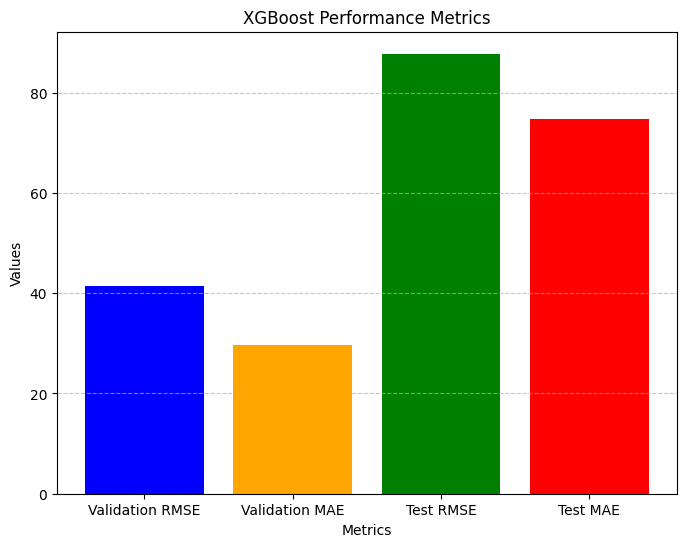

In [31]:
import matplotlib.pyplot as plt

# Define metrics from the XGBoost output
metrics = ['Validation RMSE', 'Validation MAE', 'Test RMSE', 'Test MAE']
values = [val_rmse_xgb, val_mae_xgb, rmse_xgb, mae_xgb]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
plt.title("XGBoost Performance Metrics")
plt.ylabel("Values")
plt.xlabel("Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
